<a href="https://colab.research.google.com/github/Ekawaka/MACHINE-LEARNING-1/blob/main/Week%201%20-%20Data%20Cleaning/Data_Cleaning_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction - Importing the data and Doing data cleaning

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/okothchristopher/machine-learning-projects/master/01.%20Week%201%20Machine%20Learning%20Data%20Preparation%20-%20Semiconductor%20Data/Data%20Preparation%20Project%201/chip_dataset.csv')
df.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


# 1. Explore the missingness in the dataset for categorical and numerical data


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

<Axes: >

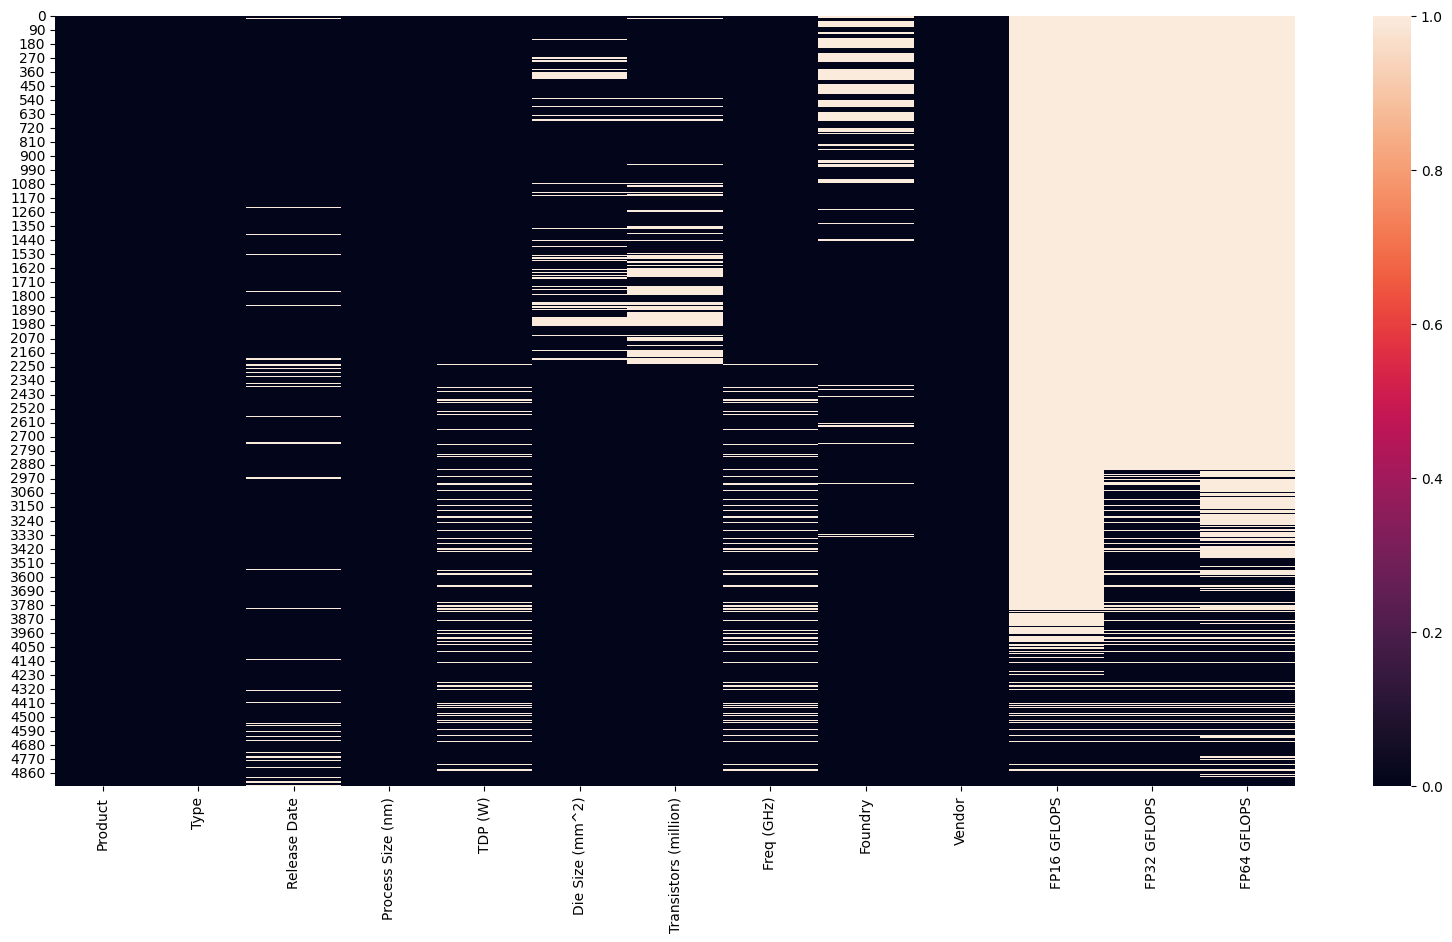

In [14]:
### To explore them further
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [80]:
data = df.copy()

### Solving for missingness

In [81]:

# Set a threshold for minimum allowed non-missing values (e.g., 40% of total rows)
threshold = 0.2
# Remove columns where the number of non-missing data is below the threshold
data_dropped_high_missing = data.dropna(thresh=int(threshold * len(data)), axis=1)

print("Original dataset shape:", data.shape)
print("Dataset shape after dropping columns with high missingness:", data_dropped_high_missing.shape)

Original dataset shape: (4854, 14)
Dataset shape after dropping columns with high missingness: (4854, 13)


In [82]:
# Remove columns where the number of non-missing data is below the threshold
data = data.dropna(thresh=int(threshold * len(data)), axis=1)

In [83]:
# Impute missing values in numerical columns with mean
numerical_cols = data.select_dtypes(include=['float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Impute missing values in categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# 2. Dropping Columns

In [87]:
# 3. Drop non-consequntial fields
# Identify non-consequential fields (columns) based on your analysis needs
non_consequential_fields = ['Unnamed: 0']

# Drop non-consequential fields from the dataset
data = data.drop(columns=non_consequential_fields)

# Display the resulting dataset
print("Data after dropping non-consequential fields:")
data.head()

Data after dropping non-consequential fields:


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,696.0,89.28
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,696.0,89.28
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,148.0,624.0,2600.0,Intel,Intel,696.0,89.28
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,696.0,89.28
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,696.0,89.28


# 3. Transforming Data

In [88]:
# 4. Transform temporal data to their corrrect format (date time)

# Convert to date-time format
data['Release Date'] = pd.to_datetime(data['Release Date'])

# Check the data type to confirm the transformation
print(data['Release Date'].dtype)

datetime64[ns]


# Assumptions
1. Mores Law

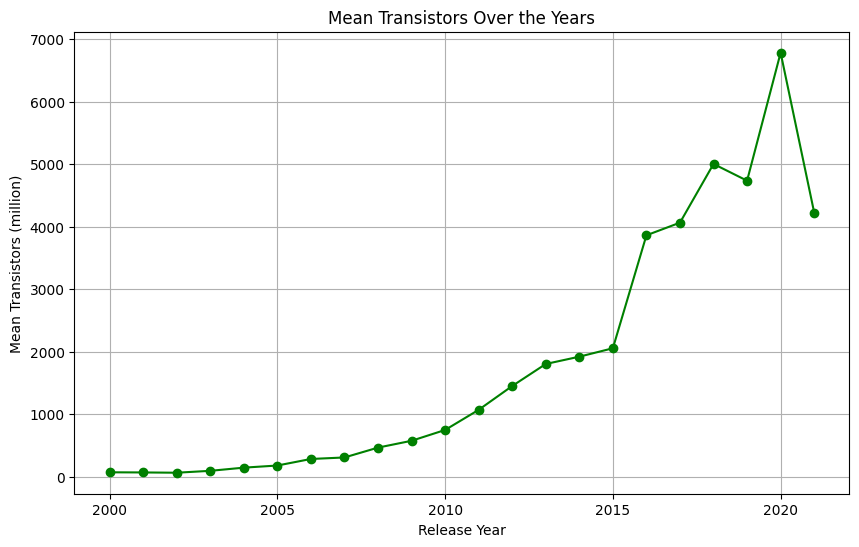

In [90]:
yearly_progress = data.groupby(data["Release Date"].dt.year)["Transistors (million)"].mean()
# Create a line plot of mean Transistors over the years
plt.figure(figsize=(10, 6))
yearly_progress.plot(color= 'green', marker="o")
plt.title("Mean Transistors Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Mean Transistors (million)")
plt.grid()
plt.show()

Text(0.5, 1.0, 'CHANGES IN TRANSISTOR SIZE AND CORRESPONDING VALUES IN TRANSISTOR POWER DENSITY')

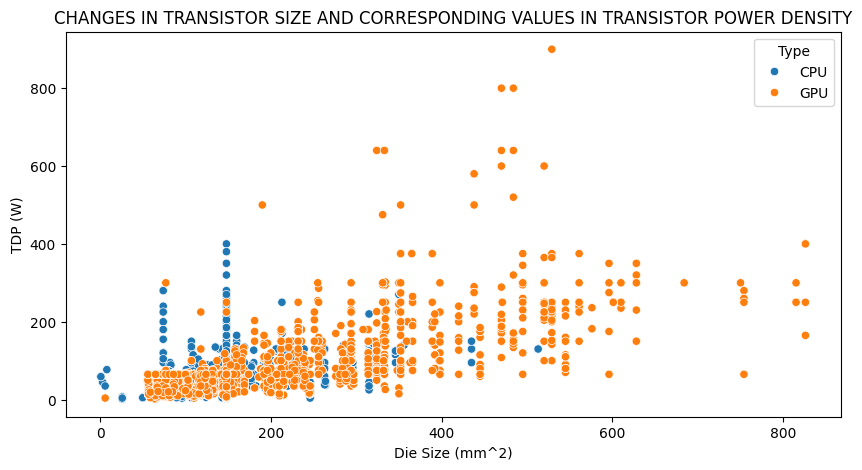

In [91]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Die Size (mm^2)",
           y="TDP (W)",
           data=data,
           hue="Type")
plt.title('CHANGES IN TRANSISTOR SIZE AND CORRESPONDING VALUES IN TRANSISTOR POWER DENSITY')

Text(0.5, 1.0, 'CPUS HAVE HIGHER FREQUENCY BUT GPUS ARE CATCHING UP')

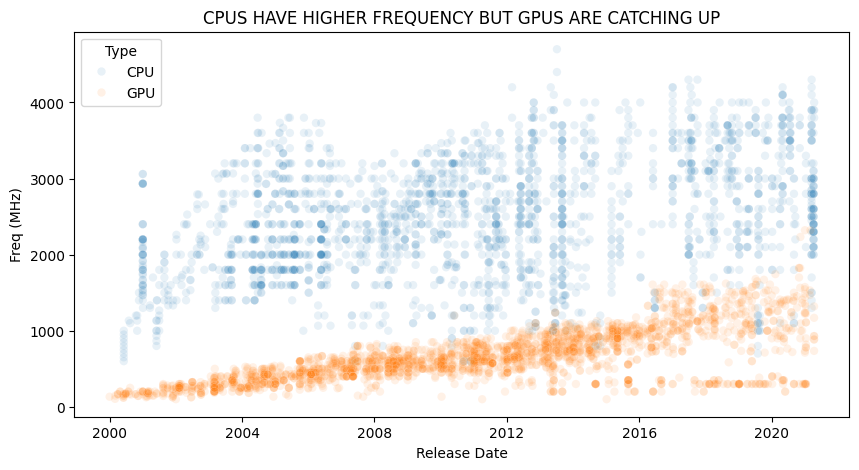

In [95]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Release Date",
           y="Freq (MHz)",
           data=data,
           hue="Type", # The type is the classification of whether the chip is a GPU or a CPU
           alpha = 0.1) # Controls the level of transparency
plt.title('CPUS have higher Frequency but GPUs are catching up'.upper())

In [94]:
data.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)', 'Foundry',
       'Vendor', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')